To use this notebook, you need three files stored in directory data/ relative to the current path. The files are available as a zip at 
http://folk.uio.no/jorgeem/download/example_data.zip

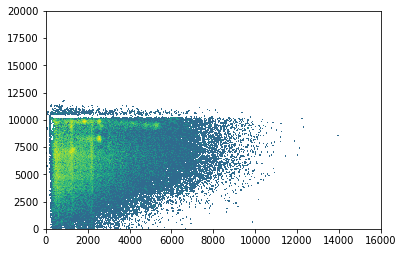

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from oslo_method import oslo_method

# Give location of response matrix and other necessary response data:
fname_resp_mat = "data/response_matrix-Re187-10keV.m"
fname_resp_dat = "data/resp-Re187-10keV.dat"

# Create instance of main class:
om = oslo_method(fname_resp_mat, fname_resp_dat)

# Load raw matrix:
fname_raw = "data/alfna-Re187.m"
om.raw.load(fname_raw)

om.raw.plot()
plt.show()

Unfolding in verbose mode. Starting.
Lowest Eg value = 0.0
Lowest Ex value = 0.0
Folding iteration = 0, chisquare = 236908.45257553668
Folding iteration = 1, chisquare = 69101.91060887878
Folding iteration = 2, chisquare = 32049.183936006782
Folding iteration = 3, chisquare = 20621.735653599324
Folding iteration = 4, chisquare = 15283.192818951007
Folding iteration = 5, chisquare = 12208.518500773564
Folding iteration = 6, chisquare = 10209.404656296436
Folding iteration = 7, chisquare = 8800.032693855785
Folding iteration = 8, chisquare = 7747.092507094887
Folding iteration = 9, chisquare = 6925.543258133718
Folding iteration = 10, chisquare = 6262.896383670064
Folding iteration = 11, chisquare = 5714.512478611154
Time elapsed: 
File import = 2.170384 s 
Rebinning = 0.000005 s 
Unfolding = 2.520913 s


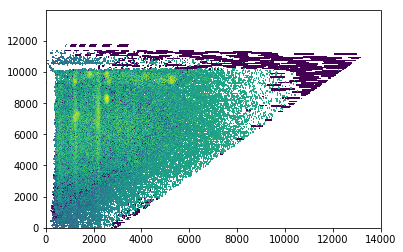

In [5]:
# TODO find a better system for setting the parameters for om.base_analysis.

# Run unfolding and save result
om.base_analysis.use_comptonsubtraction = False
om.unfold(verbose=True)
fname_unfolded = "data/unfolded-Re187.m"
om.unfolded.save(fname_unfolded)

om.unfolded.plot()
plt.show()

/home/jorgenem/gitrepos/oslo_method_python/_matrix_analysis.py:671: RuntimeWarning: divide by zero encountered in true_divide
  W_old = np.where(Eg_mesh > 0, np.power(Eg_mesh,n_f) / np.power(Ef_mesh, 2) * np.exp(2*np.sqrt(a_f*Ef_mesh/1000)), 0)
/home/jorgenem/gitrepos/oslo_method_python/_matrix_analysis.py:671: RuntimeWarning: invalid value encountered in true_divide
  W_old = np.where(Eg_mesh > 0, np.power(Eg_mesh,n_f) / np.power(Ef_mesh, 2) * np.exp(2*np.sqrt(a_f*Ef_mesh/1000)), 0)


iteration = 0 max_diff = 218.6580814233571
iteration = 1 max_diff = 22.69542685225259
iteration = 2 max_diff = 4.125877494104256
iteration = 3 max_diff = 0.9317932500656507
iteration = 4 max_diff = 0.40955673107362545
iteration = 5 max_diff = 0.15363792076478244
iteration = 6 max_diff = 0.043122593742213056
iteration = 7 max_diff = 0.04877722226708503
iteration = 8 max_diff = 0.06516367230360887
iteration = 9 max_diff = 0.08148565549352549
H.shape = (350, 1400)
Ex_array.shape = (350,)
Egamma_array.shape = (1400,)


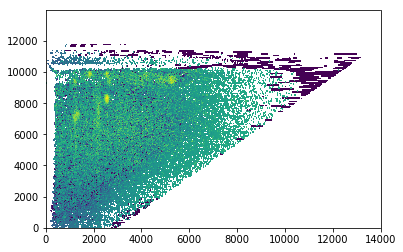

In [6]:

# Run first generation method and save result:
om.base_analysis.N_Exbins_fg = om.base_analysis.unfolded.matrix.shape[0] # Take all bins
om.base_analysis.Ex_max_fg = om.base_analysis.unfolded.Ex_array[-1] - 2000 # TODO figure out if this is needed and how it relates to max Eg
om.base_analysis.dEg_fg = 1000 # keV
om.first_generation_method()
fname_firstgen = "data/firstgen-Re187.m"
om.firstgen.save(fname_firstgen)

om.firstgen.plot()
plt.show()

In [10]:


fname_ensemble_folder = "ensemble_Re187_poisson"
om.setup_error_propagation()
N_ensemble_members = 10
om.propagate_errors(N_ensemble_members=N_ensemble_members, purge_files=True)

# TODO figure out why the first_generation_method() prints the exact same max_diff for all the perturbation members...




om.var_firstgen.plot()
plt.show()



/home/jorgenem/gitrepos/oslo_method_python/_matrix_analysis.py:671: RuntimeWarning: divide by zero encountered in true_divide
  W_old = np.where(Eg_mesh > 0, np.power(Eg_mesh,n_f) / np.power(Ef_mesh, 2) * np.exp(2*np.sqrt(a_f*Ef_mesh/1000)), 0)
/home/jorgenem/gitrepos/oslo_method_python/_matrix_analysis.py:671: RuntimeWarning: invalid value encountered in true_divide
  W_old = np.where(Eg_mesh > 0, np.power(Eg_mesh,n_f) / np.power(Ef_mesh, 2) * np.exp(2*np.sqrt(a_f*Ef_mesh/1000)), 0)


iteration = 0 max_diff = 218.6580814233571
iteration = 1 max_diff = 22.69542685225259
iteration = 2 max_diff = 4.125877494104256
iteration = 3 max_diff = 0.9317932500656507
iteration = 4 max_diff = 0.40955673107362545
iteration = 5 max_diff = 0.15363792076478244
iteration = 6 max_diff = 0.043122593742213056
iteration = 7 max_diff = 0.04877722226708503


KeyboardInterrupt: 

3.2311742677852644e-27
